# Michaels Menten Kinetik

$$
\frac{d[P]}{dt} = k_{cat}[ES]
$$
$$
\frac{d[S]}{dt} = k_r[ES] - k_v[E][S]
$$
$$
\frac{d[E]}{dt} = -k_v[E][S] + k_r[ES] + k_{cat}[ES]
$$
$$
\frac{d[ES]}{dt} = k_v[E][S] - k_r[ES] - k_{cat}[ES]
$$

In [9]:
import numpy as np
import scipy.integrate as solver

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

import ipywidgets as inter

In [15]:
# k_r schnell: komplex zerfaellt langsamer als es sich bildet
# k_v schnell: komplex bildet sich schneller als es zerfaellt
# k_cat:       produkte reaktion ist langsam
# P0:          keine produkte
# S0:          viel edukte
# E0:          ein bisschen enzym
# ES0:         noch keine komplexe
T = 8.0
steps = 1000
ts = np.linspace(0, T, steps)

In [16]:
def display(k_r, k_v, k_cat, P0, S0, E0, ES0):
    def rhs(y, t):
        P = y[0]
        S = y[1]
        E = y[2]
        ES = y[3]
        return np.array([
            k_cat*ES, 
            k_r*ES - k_v*E*S, 
            -k_v*E*S + k_r*ES + k_cat*ES, 
            k_v*E*S - k_r*ES - k_cat*ES])
    y0 = np.array([P0, S0, E0, ES0])
    ys = solver.odeint(rhs, y0, ts)
    Ps = ys[:, 0]
    Ss = ys[:, 1]
    Es = ys[:, 2]
    ESs = ys[:, 3]
    plt.plot(ts, Ps, label="[P]")
    plt.plot(ts, Ss, label="[S]")
    plt.plot(ts, Es, label="[E]")
    plt.plot(ts, ESs, label="[ES]")
    plt.legend()
    plt.xlabel("t/s")
    plt.ylabel("c/mol")
    plt.show()

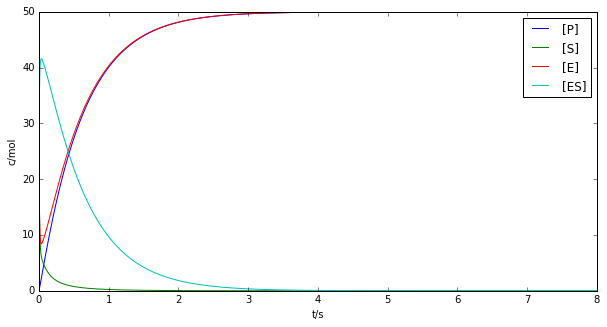

In [17]:
const_range = (1.0, 10.0, 0.1)
init_range = (0.0, 100.0, 1.0)
inter.interact(display, k_r=const_range, k_v=const_range, k_cat=const_range, 
                        P0=init_range, S0=init_range, E0=init_range, ES0=init_range)